In [15]:
# LIBRERIAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# IMPORTACION ARCHIVO
import pandas as pd

archivo = r"C:\Users\MAITE\Desktop\JOSE\IT_ACADEMY\2_ Especializacion Analisis de datos\x_Proyecto_Simulacion_Empresarial\Proyecto_RRHH\SPRINT_4\PRESENTACION\RRHH_21072025_EDA.xlsx"
xls = pd.ExcelFile(archivo, engine="openpyxl")

for sheet in xls.sheet_names:
    print(sheet)

Competencias_formacion_2019
Competencias_formacion_2020
Competencias_formacion_2021
Competencias_formacion_2022
Competencias_formacion_2023
Medios_Formacion_2023
Competencias_desarrollo_2019
Competencias_desarrollo_2020
Competencias_desarrollo_2021
Competencias_desarrollo_2022
Competencias_desarrollo_2023


# COMPETENCIAS_DESARROLLO

#### CREACION DATAFRAME df_competencias_desarrollo_2019_2023

In [17]:
# CREACION DATAFRAME df_competencias_desarrollo_2019_2023

hojas = {
    'Competencias_desarrollo_2023': 2023,
    'Competencias_desarrollo_2022': 2022,
    'Competencias_desarrollo_2021': 2021,
    'Competencias_desarrollo_2019': 2019,
}

df_competencias_desarrollo_2019_2023 = pd.concat(
    [pd.read_excel(archivo, sheet_name=hoja, skiprows=6).rename(columns={"Unnamed: 0": "Competencia"}).assign(Año=año)for hoja, año in hojas.items()],ignore_index=True)
df_competencias_desarrollo_2019_2023 = df_competencias_desarrollo_2019_2023[["Año", "Competencia", "MUCHO"]].copy()
df_competencias_desarrollo_2019_2023

,Año,Competencia,MUCHO
0,2023,De dirección,30.301
1,2023,De trabajo en equipo,44.824
2,2023,De atención al público/ trato a clientes,48.087
3,2023,Administrativas de oficina,24.594
4,2023,De resolución de problemas,35.486
5,2023,En lenguas extranjeras,14.744
6,2023,Básicas de cálculo y/o comunicación oral o esc...,12.756
7,2023,Generales de tecnologías de la información,18.068
8,2023,Profesionales de tecnologías de la información,11.418
9,2023,"Competencias técnicas, prácticas y otras espec...",18.061


#### GRAFICOS DATAFRAME df_Competencias_Desarrollo_2019_2023

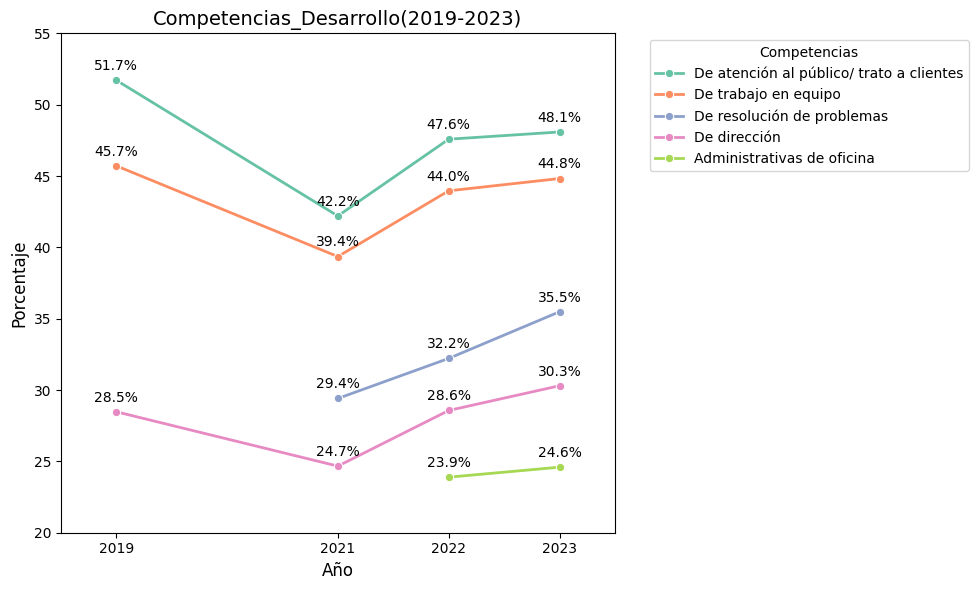

In [18]:
# GRAFICOS DATAFRAME df_Competencias_Desarrollo_2019_2023 TOP 5

top_5_competencias_2023 = df_competencias_desarrollo_2019_2023[df_competencias_desarrollo_2019_2023['Año'] == 2023].nlargest(5, 'MUCHO')
top_5_competencias = top_5_competencias_2023['Competencia'].unique()

df_top_5 = df_competencias_desarrollo_2019_2023[df_competencias_desarrollo_2019_2023['Competencia'].isin(top_5_competencias)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_5, 
             x='Año', y='MUCHO', hue='Competencia', 
             hue_order=top_5_competencias, marker='o', 
             linewidth=2, palette='Set2')

for competencia in top_5_competencias:
    subset = df_top_5[df_top_5['Competencia'] == competencia]  
    for idx, row in subset.iterrows():
        plt.text(row['Año'], row['MUCHO']+0.5, f'{row["MUCHO"]:.1f}%', 
                 color='black', ha='center', va='bottom', fontsize=10)

plt.title("Competencias_Desarrollo(2019-2023)", fontsize=14)

plt.xlabel("Año", fontsize=12)
plt.xticks([2019,2021,2022,2023])
plt.xlim(2018.5,2023.5)
plt.ylabel("Porcentaje", fontsize=12)
plt.ylim(20,55)

plt.legend(title="Competencias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


# MEDIOS_FORMACION

#### CREACION DATAFRAME df_Medios_Formacion_2023

In [19]:
# CREACION DATAFRAME df_Medios_Formacion_2023

df_Medios_Formacion_2023 = pd.read_excel(archivo, sheet_name='Medios_Formacion_2023')

df_Medios_Formacion_2023 = df_Medios_Formacion_2023.iloc[[5,19],:].reset_index(drop=True)
df_Medios_Formacion_2023.columns = df_Medios_Formacion_2023.iloc[0]

df_Medios_Formacion_2023 = df_Medios_Formacion_2023.dropna().drop(columns='TOTAL').rename(columns={'Nan':'Medio'})

df_Medios_Formacion_2023 = df_Medios_Formacion_2023.T.reset_index().rename(columns={0:'Medio',1:'Porcentaje'})

df_Medios_Formacion_2023 = df_Medios_Formacion_2023.dropna()
df_Medios_Formacion_2023['Porcentaje'] = df_Medios_Formacion_2023['Porcentaje'].astype(float).round(1)
df_Medios_Formacion_2023 = df_Medios_Formacion_2023.sort_values('Porcentaje',ascending=False).reset_index(drop=True)

df_Medios_Formacion_2023


,Medio,Porcentaje
0,Cursos de formación diseñados y gestionados po...,62.4
1,"Formación planificada en el puesto de trabajo,...",42.2
2,Cursos de formación diseñados y gestionados p...,23.8
3,Aprendizaje planificado a partir de rotación d...,16.0
4,"Participación en conferencias, seminarios, gru...",13.8


#### GRAFICOS DATAFRAME df_Medios_Formacion_2023

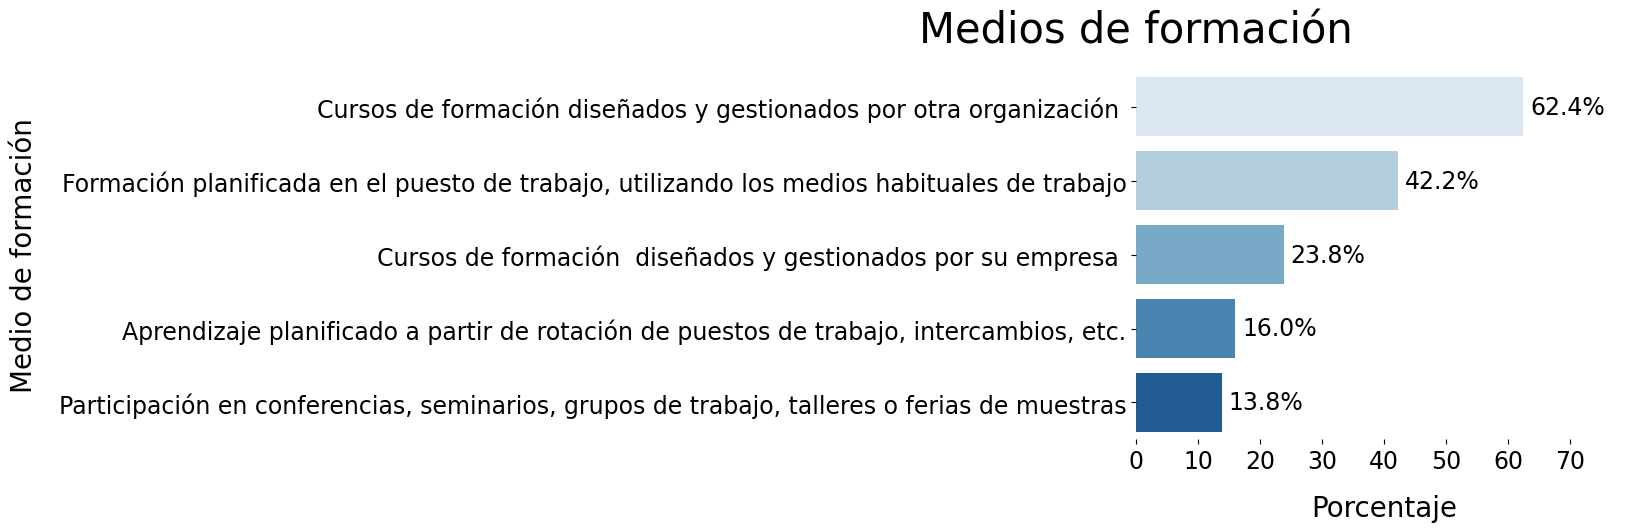

In [20]:
# GRAFICOS DATAFRAME df_Medios_Formacion_2023

ax = sns.barplot(
    data=df_Medios_Formacion_2023,         
    x="Porcentaje",
    y="Medio",
    order=None,               
    orient="h",  
    hue="Medio",
    hue_order=None,        
    palette="Blues",        
    saturation=0.75,       
    color=None,            
    )

for p in ax.patches:
    ax.annotate(f"{p.get_width():.1f}%",  
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='left', va='center',  
                fontsize=17, color='black',  
                xytext=(5, 0),  
                textcoords='offset points')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title("Medios de formación",fontsize=30,x=0,pad=20)
plt.xlabel("Porcentaje",fontsize=20,labelpad=15,)
plt.xticks(ticks=[0,10,20,30,40,50,60,70], fontsize=17,)
plt.ylabel("Medio de formación",fontsize=20,labelpad=15)
plt.xlim(0,80)

plt.yticks(fontsize=17,)
plt.show()


# COMPETENCIAS_FORMACION

#### CREACION DATAFRAME df_competencias_formacion_2019_2023

In [21]:
# CREACION DATAFRAME df_competencias_formacion_2019_2023

hojas_2 = {
    'Competencias_formacion_2023': 2023,
    'Competencias_formacion_2022': 2022,
    'Competencias_formacion_2021': 2021,
    'Competencias_formacion_2020': 2020,
    'Competencias_formacion_2019': 2019,
}

df_competencias_formacion_2019_2023 = pd.concat(
    [pd.read_excel(archivo, sheet_name=hoja, skiprows=6)
    .rename(columns={"Unnamed: 0": "Competencia","Unnamed: 4":"Porcentaje"})
    .assign(Año=año)for hoja, año in hojas_2.items()],ignore_index=True)

df_competencias_formacion_2019_2023 = df_competencias_formacion_2019_2023.dropna()
df_competencias_formacion_2019_2023['Porcentaje'] = df_competencias_formacion_2019_2023['Porcentaje'].astype(float).round(1)

df_competencias_formacion_2019_2023 = df_competencias_formacion_2019_2023[['Año','Competencia','Porcentaje']].copy()

df_competencias_formacion_2019_2023

,Año,Competencia,Porcentaje
1,2023,De dirección,11.6
2,2023,De trabajo en equipo,27.3
3,2023,De atención al público/ trato a clientes,27.7
4,2023,Administrativas de oficina,16.4
5,2023,Técnicas específicas del puesto de trabajo,33.4
6,2023,De resolución de problemas (localización de pr...,13.9
7,2023,En lenguas extranjeras,9.1
8,2023,Generales de tecnologías de la información,12.8
9,2023,Profesionales de tecnologías de la información,7.4
10,2023,Básicas de cálculo y/o comunicación oral o esc...,2.3


#### GRAFICOS DATAFRAME df_competencias_formacion_2019_2023

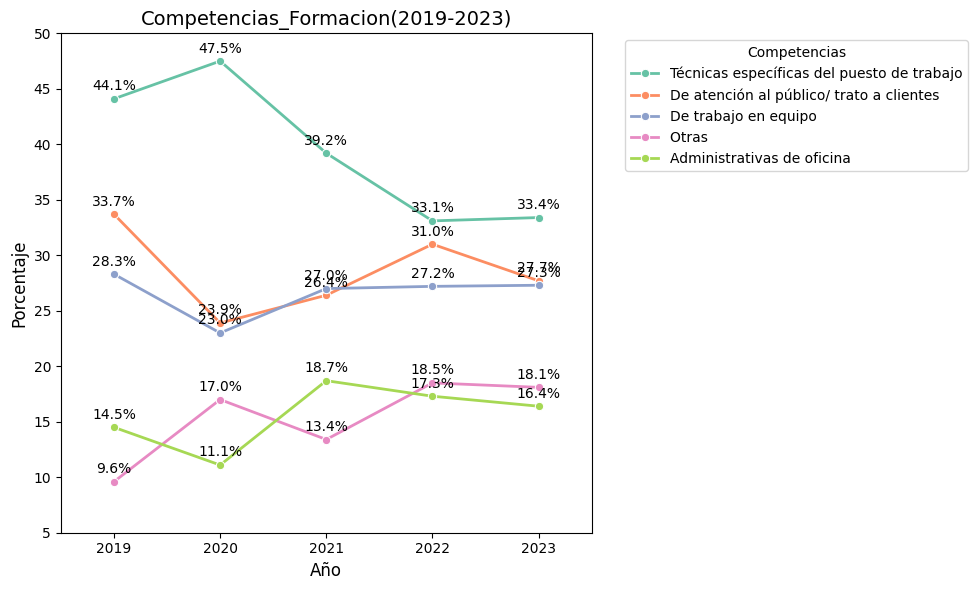

In [22]:
# GRAFICOS DATAFRAME df_competencias_desarrollo_2019_2023 TOP 5

top_5_competencias_2023 = df_competencias_formacion_2019_2023[df_competencias_formacion_2019_2023['Año'] == 2023].nlargest(5, 'Porcentaje')

# Obtener las competencias que pertenecen al top 5
top_5_competencias = top_5_competencias_2023['Competencia'].unique()

# Filtrar el DataFrame para incluir solo estas competencias
df_top_5 = df_competencias_formacion_2019_2023[df_competencias_formacion_2019_2023['Competencia'].isin(top_5_competencias)]


# Crear el gráfico de líneas con marcadores
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_5, 
             x='Año', y='Porcentaje', hue='Competencia', 
             hue_order=top_5_competencias, marker='o', 
             linewidth=2, palette='Set2')

for competencia in top_5_competencias:
    subset = df_top_5[df_top_5['Competencia'] == competencia]  
    for idx, row in subset.iterrows():
        plt.text(row['Año'], row['Porcentaje']+0.5, f'{row["Porcentaje"]:.1f}%', 
                 color='black', ha='center', va='bottom', fontsize=10)

plt.title("Competencias_Formacion(2019-2023)", fontsize=14)

plt.xlabel("Año", fontsize=12)
plt.xticks([2019,2020,2021,2022,2023])
plt.xlim(2018.5,2023.5)
plt.ylabel("Porcentaje", fontsize=12)
plt.ylim(5,50)

plt.legend(title="Competencias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()
